In [1]:
# pip install --upgrade xarray seaborn pandas numpy

In [2]:
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# ERP Analysis With Pandas And Seaborn

# Overview

In these exercises, we'll delve into the analysis and visualization of Local Field Potential (LFP) data originating from various brain regions. Leveraging Pandas, we'll aggregate and manipulate the data to facilitate a comparison of LFP signal patterns among these brain areas. Subsequently, we'll employ Seaborn to craft compelling figures for result visualization.

## Load dataset

In this section, we'll work with a dataset from a single session recording of Cori the mouse ('steinmetz_2016-12-14_Cori.nc'). Our primary objective is to read this data and convert it into a Pandas dataframe, which will serve as the foundation for the subsequent exercises.

**Load dataset and convert to Pandas dataframe:**

- **xarray:** 
  - `dset = xr.load_dataset('file.nc')`: Loads a dataset from a specified file path using the xarray library. It facilitates data manipulation and analysis of multi-dimensional arrays.
  - `to_dataframe()`: Converts the loaded xarray dataset into a Pandas DataFrame for easier data manipulation and analysis.

- **Pandas**
  - df.reset_index(): resets the index of the DataFrame, turning the current index into a new column and creating a default integer index

**Example** Read 'steinmetz_2016-12-14_Cori.nc' data using `xarray` and see what's in there!

In [3]:
dset = xr.load_dataset('steinmetz_2016-12-14_Cori.nc')
dset

<xarray.Dataset>
Dimensions:             (trial: 364, time: 250, cell: 734,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 7, spike_id: 2446173)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 359 360 361 362 363 364
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 729 730 731 732 733 734
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'ACA' 'LS' ... 'SUB' 'VISp'
  * spike_id            (spike_id) int32 1 2 3 4 ... 2446171 2446172 2446173
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 0 100 0 50 0 0 ... 0 100 50 50 0 25 100
    contrast_right      (trial) int8 0 50 50 0 100 0 0 ... 25 100 25 25 50 0 100
    gocue               (trial) float64 1.027 0.8744 0.8252 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.187 1.438 0.986 2.296 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -2.851 ... 5.571
    spike_time          (spike_id) float32 0.2676 2.308 0.8535 ... 2.189 2.399
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 734 734 734 734 734
    spike_trial         (spike_id) uint32 21 21 31 37 43 ... 364 364 364 364 364
Attributes:
    session_date:  2016-12-14
    mouse:         Cori
    stim_onset:    0.5
    bin_size:      0.01

Nice! It has many data variables including lfp. Let's look at an example on how to extract a data variable into a Pandas dataframe

**Example** Extract 'brain_area' data variable to Pandas dataframe and store it in ba variable

In [4]:
ba = dset['brain_area'].to_dataframe()
ba

,brain_area
cell,
1,ACA
2,MOs
3,ACA
4,LS
5,MOs
...,...
730,SUB
731,DG
732,DG


Hmm! It might be good to have a separate index instead of using cell

**Example** reset_index of ba and display first five rows of the data

In [5]:
ba = ba.reset_index()
ba.head(5)

,cell,brain_area
0,1,ACA
1,2,MOs
2,3,ACA
3,4,LS
4,5,MOs


Great! Now, let's do this to the data we are actually going to use for the exercises

Convert 'lfp' data to Pandas dataframe and store it in lfp variable

In [6]:
lfp = dset['lfp'].to_dataframe()
lfp

lfp
brain_area_lfp trial time           
ACA            1     0.01  -2.850794
                     0.02  -4.039683
                     0.03  -4.195238
                     0.04  -3.228571
                     0.05   0.460317
...                              ...
VISp           364   2.46   6.761410
                     2.47  11.952319
                     2.48  15.552319
                     2.49  16.043228
                     2.50   5.570501

[637000 rows x 1 columns]

Reset index of lfp and display first 5 rows

In [7]:
lfp = lfp.reset_index()
lfp.head(5)

,brain_area_lfp,trial,time,lfp
0,ACA,1,0.01,-2.850794
1,ACA,1,0.02,-4.039683
2,ACA,1,0.03,-4.195238
3,ACA,1,0.04,-3.228571
4,ACA,1,0.05,0.460317


## Explore and Visualize LFP Data for VISp Area

Now that we have our dataframe ready, let's warm up by exploring and visualizing LFP variation for only one trial and only one brain area (VISp). Then we will plot LFP measurements of all trials for VISp

We will be using Pandas dataframe methods to extract specific trial and/or brain area, and Seaborn for visualization! 

**Libraries Used:**

- **Seaborn**
  - `sns.lineplot()`: Plots a line plot

- **Pandas:**
  - `df[df.col_1 == 'val_1']`: Filter and display rows from the DataFrame where 'col_1' equals 'val_1'.
  - `df[(df.col_1 == 'val_1') & (df.col_2 == number)]`: Filter and display rows from the DataFrame where 'col_1' equals 'val_1' and 'col_2' equals a specified number.

**Example** extract only trial column

In [8]:
lfp['trial']

0           1
1           1
2           1
3           1
4           1
         ... 
636995    364
636996    364
636997    364
636998    364
636999    364
Name: trial, Length: 637000, dtype: int32

Extract only 'brain_area_lfp' 

In [9]:
lfp['brain_area_lfp']

0          ACA
1          ACA
2          ACA
3          ACA
4          ACA
          ... 
636995    VISp
636996    VISp
636997    VISp
636998    VISp
636999    VISp
Name: brain_area_lfp, Length: 637000, dtype: object

**Example** Extract all rows where 'trial' == 5

In [10]:
lfp[lfp['trial'] == 5]

,brain_area_lfp,trial,time,lfp
1000,ACA,5,0.01,13.496145
1001,ACA,5,0.02,22.851701
1002,ACA,5,0.03,24.296145
1003,ACA,5,0.04,27.840590
1004,ACA,5,0.05,29.162812
...,...,...,...,...
547245,VISp,5,2.46,-6.815213
547246,VISp,5,2.47,-12.951577
547247,VISp,5,2.48,-5.960668
547248,VISp,5,2.49,-6.260668


Extract all rows where 'trial' == 1

In [11]:
lfp[lfp['trial'] == 1]

,brain_area_lfp,trial,time,lfp
0,ACA,1,0.01,-2.850794
1,ACA,1,0.02,-4.039683
2,ACA,1,0.03,-4.195238
3,ACA,1,0.04,-3.228571
4,ACA,1,0.05,0.460317
...,...,...,...,...
546245,VISp,1,2.46,10.591280
546246,VISp,1,2.47,5.900371
546247,VISp,1,2.48,10.945826
546248,VISp,1,2.49,5.782189


Extract all rows where 'brain_area_lfp' == 'VISp'

In [12]:
lfp[lfp['brain_area_lfp'] == 'VISp']

,brain_area_lfp,trial,time,lfp
546000,VISp,1,0.01,1.127644
546001,VISp,1,0.02,-5.854174
546002,VISp,1,0.03,-7.717811
546003,VISp,1,0.04,-11.745083
546004,VISp,1,0.05,-1.735993
...,...,...,...,...
636995,VISp,364,2.46,6.761410
636996,VISp,364,2.47,11.952319
636997,VISp,364,2.48,15.552319
636998,VISp,364,2.49,16.043228


Great! Now let's combine the two column conditions together to extract all rows where 'trial' == 1 and 'brain_area_lfp' == 'VISp'

Hint: Use & to combine the two conditions

In [13]:
visp_trial_1 = lfp[(lfp['trial'] == 1) & (lfp['brain_area_lfp'] == 'VISp')]
visp_trial_1

,brain_area_lfp,trial,time,lfp
546000,VISp,1,0.01,1.127644
546001,VISp,1,0.02,-5.854174
546002,VISp,1,0.03,-7.717811
546003,VISp,1,0.04,-11.745083
546004,VISp,1,0.05,-1.735993
...,...,...,...,...
546245,VISp,1,2.46,10.591280
546246,VISp,1,2.47,5.900371
546247,VISp,1,2.48,10.945826
546248,VISp,1,2.49,5.782189


**Example** Plot trial 1 LFP measurements from VISp brain area

<Axes: xlabel='time', ylabel='lfp'>

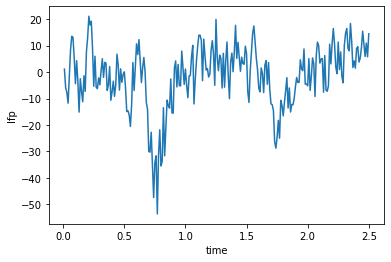

In [14]:
sns.lineplot(data=visp_trial_1, x='time', y='lfp')

Can you do the same for the second trial?

<Axes: xlabel='time', ylabel='lfp'>

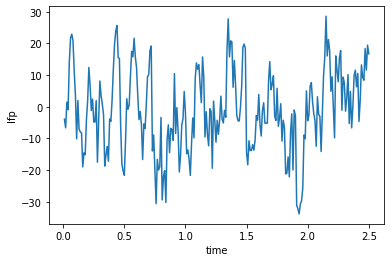

In [15]:
visp_trial_2 = lfp[(lfp['trial'] == 2) & (lfp['brain_area_lfp'] == 'VISp')]
sns.lineplot(data=visp_trial_2, x='time', y='lfp')

Good! One more for trial 3?

<Axes: xlabel='time', ylabel='lfp'>

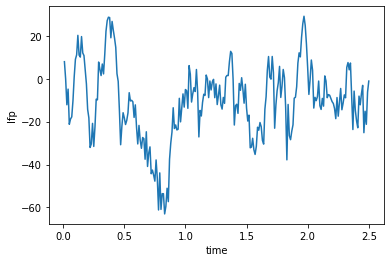

In [16]:
visp_trial_3 = lfp[(lfp['trial'] == 3) & (lfp['brain_area_lfp'] == 'VISp')]
sns.lineplot(data=visp_trial_3, x='time', y='lfp')

It will take a long time to plot all the trials? Is there a way to plot all trials in a single plot without going through each of them individually? 

Spoiler alert! Yes

Extract all rows from VISp brain area and display first five rows

In [17]:
visp = lfp[lfp['brain_area_lfp'] == 'VISp']
visp.head(5)

,brain_area_lfp,trial,time,lfp
546000,VISp,1,0.01,1.127644
546001,VISp,1,0.02,-5.854174
546002,VISp,1,0.03,-7.717811
546003,VISp,1,0.04,-11.745083
546004,VISp,1,0.05,-1.735993


Seaborn has a way of knowing that you want to plot each trial in different color by setting hue parameter.

sns.lineplot(data=, x=, y=, hue='trial')

<Axes: xlabel='time', ylabel='lfp'>

/usr/lib/python3/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


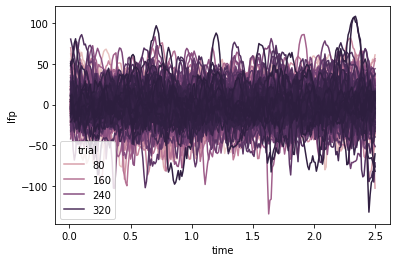

In [18]:
sns.lineplot(data=visp, x='time', y='lfp', hue='trial')

The plot is over-crowded. Can we try to use statistical measures like mean to simplify this plot?

## Visualize LFP Data for VISp Area (mean/median of all trials in a time bin)

We will aggregate LFP for all trials and plotting a single line that represents the overall trend of 'lfp' values over time across all trials.

For this we will just need Seaborn for this task as it is capable of doing all these by itself!

**Libraries Used:**

- **Seaborn**
  - `sns.lineplot()`: Plots a line plot
  - `sns.relplot()`: Plots for visualizing relationship between two variables broken into different subplots based on additional categorical data

- **Pandas:**
  - `df[df.col_1 == 'val_1']`: Filter and display rows from the DataFrame where 'col_1' equals 'val_1'.

**Example** Plot aggregate LFP values at each time bin along with error band representing the confidence interval

<Axes: xlabel='time', ylabel='lfp'>

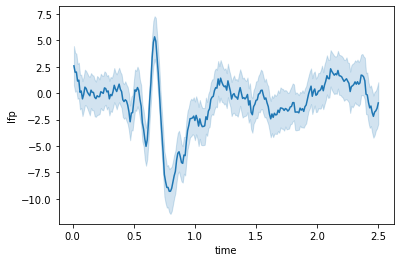

In [19]:
visp = lfp[lfp['brain_area_lfp'] == 'VISp']
sns.lineplot(data=visp, x='time', y='lfp', errorbar='ci')

That must have taken a while! The parameter `errorbar='ci'` specifies that confidence intervals should be added to the lineplot to indicate the uncertainty in the data. Seaborn will compute and add error bars to the plot to represent the confidence intervals for the data points. We can make this quicker by setting the parameter `n_boot` to a numerical value which sets the number of bootstrap resampling iterations used to compute the confidence intervals. 

Repeat the same plot but set n_boot=100

<Axes: xlabel='time', ylabel='lfp'>

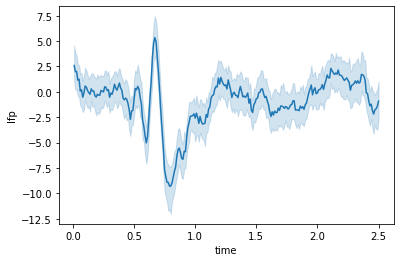

In [20]:
sns.lineplot(data=visp, x='time', y='lfp', errorbar='ci', n_boot=100)

Seaborn provides different ways to represent the uncertainty (errorbar) apart from 'ci'. 

Set errorbar='sd' to plot standard deviation instead of confidence intervals

<Axes: xlabel='time', ylabel='lfp'>

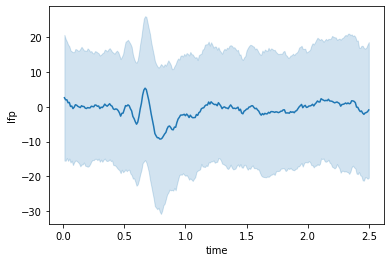

In [21]:
sns.lineplot(data=visp, x='time', y='lfp', errorbar='sd', n_boot=100)

Set errorbar='se' to plot standard error 

<Axes: xlabel='time', ylabel='lfp'>

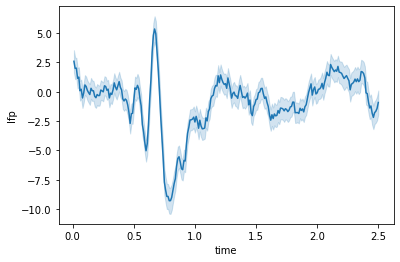

In [22]:
sns.lineplot(data=visp, x='time', y='lfp', errorbar='se', n_boot=100)

Let's do the same for ACA brain area

<Axes: xlabel='time', ylabel='lfp'>

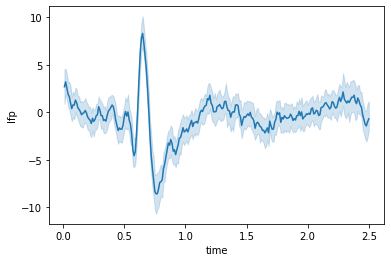

In [23]:
aca = lfp[lfp['brain_area_lfp'] == 'ACA']
sns.lineplot(data=aca, x='time', y='lfp', errorbar='ci', n_boot=100)

One more for LS 

<Axes: xlabel='time', ylabel='lfp'>

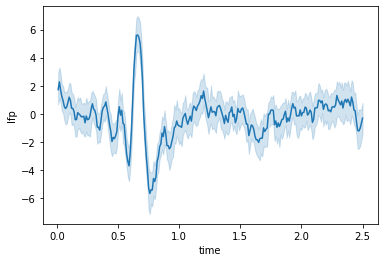

In [24]:
ls = lfp[lfp['brain_area_lfp'] == 'LS']
sns.lineplot(data=ls, x='time', y='lfp', errorbar='ci', n_boot=100)

Wouldn't it be great if we can have this plot for all brain areas with a single line?

Seaborn has this capability with the help of relational plot or `relplot`.

The syntax is same as sns.lineplot except that it needs twoone more arguments. 

What sort of plot do we need? Scatter plot or line plot?: `kind='scatter'` or `kind='line'`

Which column will be used to split the plots into columns? In our case, we want a different column for each brain area: `col='brain_area_lfp'`. 

Seaborn relational plot (relplot) with line plots for 'lfp' values over 'time', organized into separate columns for different 'brain_area_lfp', while including error bars based on bootstrapped confidence intervals (CI) computed from 10 resamples.

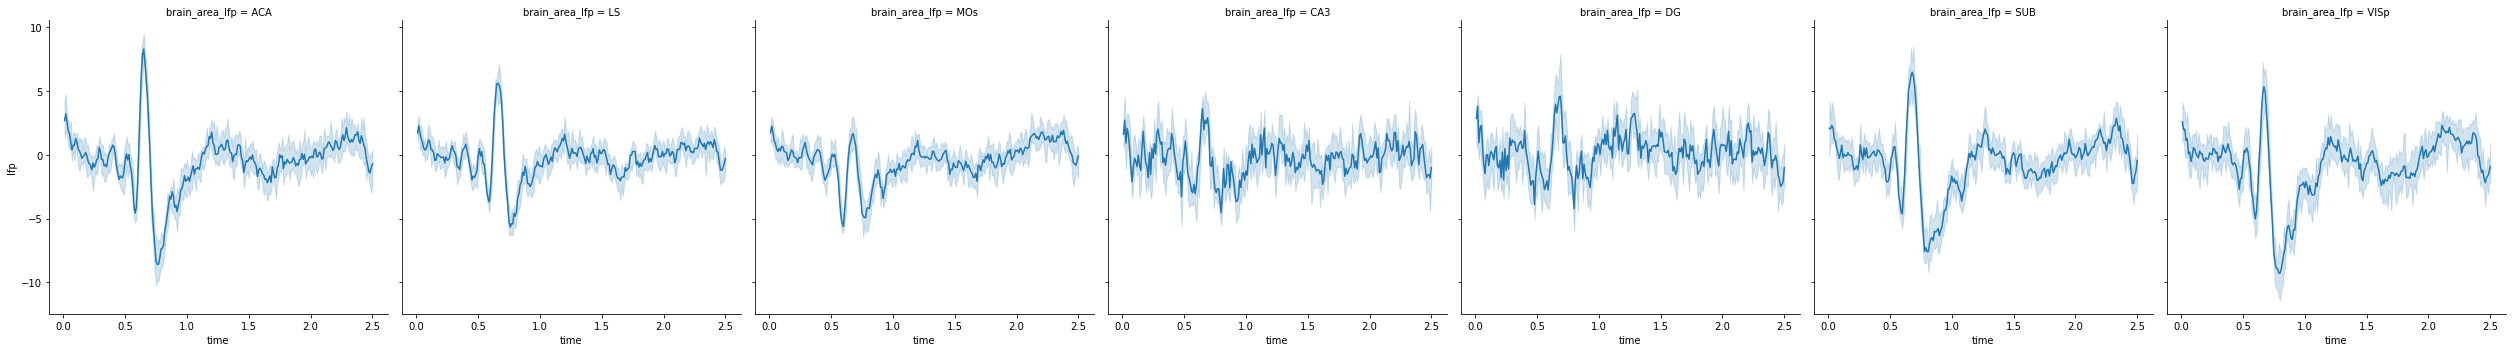

In [25]:
sns.relplot(data=lfp, x='time', y='lfp', col='brain_area_lfp', kind='line', errorbar='ci', n_boot=10)

That plot looks a bit too long. Wouldn't it be nice to have only three columns? We can let relplot know this by using the argument `col_wrap=3`

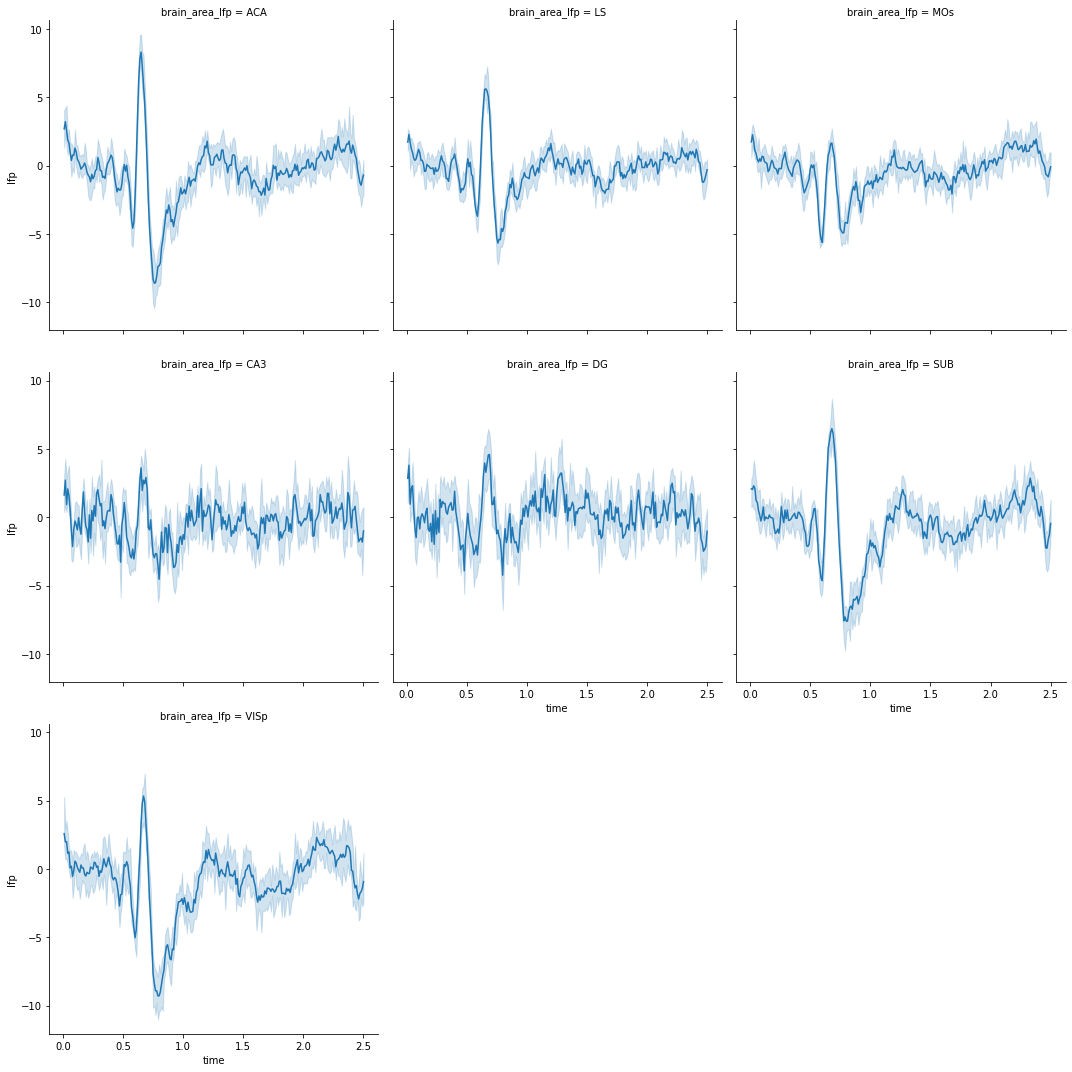

In [26]:
sns.relplot(data=lfp, x='time', y='lfp', col='brain_area_lfp', col_wrap=3, kind='line', errorbar='ci', n_boot=10)

## Visualizing Average LFP Data with Heatmap

Let's try to visualize same information for all brain area in a different format. This case, heatmap could be very informative to identify patterns in the time series of mean LFP signal across all trials.

We will make use of group-by method of Pandas dataframe to aggregate LFP and Seaborn heatmap method to visualize

**Libraries Used:**
- **seaborn:**
  - `sns.heatmap()`: Create a heatmap visualization to display the mean LFP data using a color gradient.

- **Pandas:**
  - `df.groupby()`: Aggregate colums with respect to a categorical valued column
  - `df.unstack()`: Convert multi-index dataframe to wide format table

**Example** Find mean lfp of each brain_area 

In [27]:
lfp.groupby('brain_area_lfp')['lfp'].mean()

brain_area_lfp
ACA    -0.514545
CA3    -0.330150
DG      0.186883
LS     -0.244636
MOs    -0.440104
SUB    -0.595160
VISp   -0.885078
Name: lfp, dtype: float64

Find mean lfp of each time

In [28]:
lfp.groupby('time')['lfp'].mean()

time
0.01    2.185657
0.02    2.613272
0.03    1.737390
0.04    1.663617
0.05    1.403416
          ...   
2.46   -1.527758
2.47   -1.618838
2.48   -1.494268
2.49   -1.259201
2.50   -0.640280
Name: lfp, Length: 250, dtype: float64

There are other aggregation methods too like median(), std() for standard deviation, min() for minimum, max() for maximum, etc

Find median LFP of each brain area

In [29]:
lfp.groupby('brain_area_lfp').median()

,trial,time,lfp
brain_area_lfp,,,
ACA,182.5,1.255,-0.479932
CA3,182.5,1.255,-0.426170
DG,182.5,1.255,0.299241
LS,182.5,1.255,-0.173639
MOs,182.5,1.255,-0.463571
SUB,182.5,1.255,-0.636395
VISp,182.5,1.255,-1.085343


Find minimum lfp of each brain_area

In [30]:
lfp.groupby('brain_area_lfp')['lfp'].min()

brain_area_lfp
ACA    -122.177778
CA3    -130.074430
DG     -172.058377
LS      -84.084014
MOs    -100.964490
SUB    -114.875510
VISp   -133.851206
Name: lfp, dtype: float64

Find maximum lfp of each brain_area

In [31]:
lfp.groupby('brain_area_lfp')['lfp'].max()

brain_area_lfp
ACA     143.055556
CA3     140.405762
DG      173.035358
LS       86.690986
MOs     126.365510
SUB     152.306463
VISp    108.156215
Name: lfp, dtype: float64

Find standard deviation of LFP in each brain area

In [32]:
lfp.groupby('brain_area_lfp')['lfp'].std()

brain_area_lfp
ACA     14.644016
CA3     19.595801
DG      21.019145
LS      11.689013
MOs     12.413976
SUB     15.402966
VISp    17.691439
Name: lfp, dtype: float64

**Example** Let's find mean lfp value of each trial of each brain area

In [33]:
lfp.groupby(['brain_area_lfp', 'trial'])['lfp'].mean()

brain_area_lfp  trial
ACA             1         0.677562
                2        -1.527103
                3        -4.225222
                4        -6.515680
                5         0.106590
                           ...    
VISp            360      -1.776045
                361      11.029212
                362      -2.597403
                363      -1.453761
                364      -0.708299
Name: lfp, Length: 2548, dtype: float64

Find mean lfp value of each time bin of each brain area

In [34]:
lfp.groupby(['brain_area_lfp', 'time'])['lfp'].mean()

brain_area_lfp  time
ACA             0.01    2.685471
                0.02    3.209860
                0.03    2.529335
                0.04    1.884860
                0.05    1.645758
                          ...   
VISp            2.46   -2.188754
                2.47   -1.785507
                2.48   -1.664128
                2.49   -1.426965
                2.50   -0.917550
Name: lfp, Length: 1750, dtype: float64

We can convert this to a wide format using `.unstack()` method. Can we try that?

In [35]:
lfp.groupby(['brain_area_lfp', 'time'])['lfp'].mean().unstack()

time,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.50
brain_area_lfp,,,,,,,,,,,,,,,,,,,,,
ACA,2.685471,3.209860,2.529335,1.884860,1.645758,0.967400,0.379396,0.767064,0.746887,1.277259,...,1.500397,1.202992,0.766545,0.520117,-0.258943,-0.766727,-1.254212,-1.441269,-1.015720,-0.695543
CA3,1.629518,2.715249,0.921293,2.078533,1.577401,0.502660,-0.979725,-2.140682,-0.898762,-0.274732,...,0.523830,0.558090,0.804373,-0.148924,-0.979483,-1.787499,-1.612644,-1.523681,-1.815537,-0.997259
DG,2.856145,3.810049,0.956899,2.094294,2.304235,0.560752,-0.789523,-1.486271,-0.024381,0.018169,...,-0.381524,-0.424394,-0.055719,-0.466114,-1.583032,-1.889798,-2.485345,-2.341369,-2.132770,-1.018312
LS,1.720520,2.275740,1.694925,1.233181,0.944536,0.527159,0.375900,0.496161,0.811752,1.184257,...,1.192567,0.850740,0.275717,0.209463,-0.530762,-1.182547,-1.228083,-1.042186,-0.693559,-0.309539
MOs,1.733737,2.255798,1.747858,1.093847,0.884589,0.458545,0.264287,0.504369,0.316759,0.677858,...,1.070688,0.696952,0.319012,0.146512,-0.086345,-0.637883,-0.711565,-0.824916,-0.466098,-0.092499
SUB,2.083217,2.036742,2.304416,2.115268,1.226303,1.093702,0.492191,0.151257,-0.273056,0.103867,...,0.069480,0.792099,0.296312,-0.383038,-1.296088,-2.241097,-2.254512,-1.622324,-1.263761,-0.451261
VISp,2.590992,1.989468,2.007001,1.145337,1.241092,0.083449,0.207126,-0.535956,-0.108534,0.574958,...,-0.163704,-0.883659,-1.384658,-1.213079,-1.829013,-2.188754,-1.785507,-1.664128,-1.426965,-0.917550


Amazing! Put this result in a dataframe

In [36]:
group = lfp.groupby(['brain_area_lfp', 'time'])['lfp'].mean().unstack()
group

time,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.50
brain_area_lfp,,,,,,,,,,,,,,,,,,,,,
ACA,2.685471,3.209860,2.529335,1.884860,1.645758,0.967400,0.379396,0.767064,0.746887,1.277259,...,1.500397,1.202992,0.766545,0.520117,-0.258943,-0.766727,-1.254212,-1.441269,-1.015720,-0.695543
CA3,1.629518,2.715249,0.921293,2.078533,1.577401,0.502660,-0.979725,-2.140682,-0.898762,-0.274732,...,0.523830,0.558090,0.804373,-0.148924,-0.979483,-1.787499,-1.612644,-1.523681,-1.815537,-0.997259
DG,2.856145,3.810049,0.956899,2.094294,2.304235,0.560752,-0.789523,-1.486271,-0.024381,0.018169,...,-0.381524,-0.424394,-0.055719,-0.466114,-1.583032,-1.889798,-2.485345,-2.341369,-2.132770,-1.018312
LS,1.720520,2.275740,1.694925,1.233181,0.944536,0.527159,0.375900,0.496161,0.811752,1.184257,...,1.192567,0.850740,0.275717,0.209463,-0.530762,-1.182547,-1.228083,-1.042186,-0.693559,-0.309539
MOs,1.733737,2.255798,1.747858,1.093847,0.884589,0.458545,0.264287,0.504369,0.316759,0.677858,...,1.070688,0.696952,0.319012,0.146512,-0.086345,-0.637883,-0.711565,-0.824916,-0.466098,-0.092499
SUB,2.083217,2.036742,2.304416,2.115268,1.226303,1.093702,0.492191,0.151257,-0.273056,0.103867,...,0.069480,0.792099,0.296312,-0.383038,-1.296088,-2.241097,-2.254512,-1.622324,-1.263761,-0.451261
VISp,2.590992,1.989468,2.007001,1.145337,1.241092,0.083449,0.207126,-0.535956,-0.108534,0.574958,...,-0.163704,-0.883659,-1.384658,-1.213079,-1.829013,-2.188754,-1.785507,-1.664128,-1.426965,-0.917550


Visualize this using heatmap with the help of below code

sns.heatmap(name_of_the_grouped_dataframe)

<Axes: xlabel='time', ylabel='brain_area_lfp'>

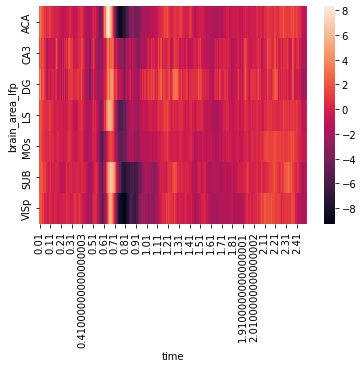

In [37]:
sns.heatmap(group)

We can select color map by specifying 'cmap'. There are many color maps to choose from like

'viridis'

'inferno'

'Greys'
 
etc


Plot a heatmap and set cmap='viridis'

<Axes: xlabel='time', ylabel='brain_area_lfp'>

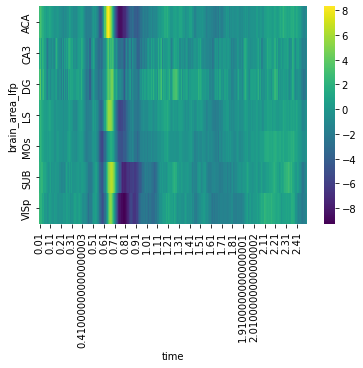

In [38]:
sns.heatmap(group, cmap='viridis')

We can set minimum and maximum values to anchor the colormap using vmin and vmax 

Set vmin=-6 and vmax=6

<Axes: xlabel='time', ylabel='brain_area_lfp'>

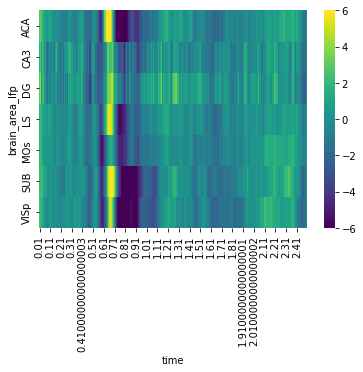

In [39]:
sns.heatmap(group, cmap='viridis', vmin=-6, vmax=6)